# Data Selection

- You need to search for open datasets, 
 - Import some medical data 
 - Manipulate the data by using 
   - Appropriate visualisation tools 
   - Or libraries of your choice. 
 - The visualisation of the chosen dataset 
   - Must be documented with providing rationale behind using either of the tools
   - And its relevance in the healthcare sector.
- Data.gov.uk

# Data Preparation

- Assess the quality of your data using suitable techniques. 
- Clean the data if and as necessary. 
- Your report should document and justify any techniques you have utilised 
  - to assess the quality of the data. 
  - Your justification must be informed by research.

In [3]:
import pandas as pd

filename = 'Data.xlsx'
df = pd.read_excel(filename)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              2076 non-null   datetime64[ns]
 1   areaName                          2076 non-null   object        
 2   newCasesByPublishDate             2076 non-null   int64         
 3   cumCasesByPublishDate             6 non-null      float64       
 4   newDeaths28DaysByPublishDate      2076 non-null   int64         
 5   cumDeaths28DaysByPublishDate      2076 non-null   int64         
 6   cumDeaths28DaysByPublishDateRate  2076 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 113.7+ KB


In [5]:
df[['date', 'areaName', 'newCasesByPublishDate','newDeaths28DaysByPublishDate']]


,date,areaName,newCasesByPublishDate,newDeaths28DaysByPublishDate
0,2021-01-01,South West,2104,30
1,2021-01-02,South West,3093,13
2,2021-01-03,South West,2337,21
3,2021-01-04,South West,3316,19
4,2021-01-05,South West,2972,46
...,...,...,...,...
2071,2021-12-08,North West,4919,19
2072,2021-12-09,North West,4066,13
2073,2021-12-10,North West,4886,17
2074,2021-12-11,North West,6004,19


In [6]:
df[['date', 'areaName', 'cumCasesByPublishDate','cumDeaths28DaysByPublishDate','cumDeaths28DaysByPublishDateRate']]


,date,areaName,cumCasesByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate
0,2021-01-01,South West,NaN,3422,60.5
1,2021-01-02,South West,NaN,3435,60.7
2,2021-01-03,South West,NaN,3456,61.1
3,2021-01-04,South West,NaN,3475,61.4
4,2021-01-05,South West,NaN,3521,62.2
...,...,...,...,...,...
2071,2021-12-08,North West,NaN,20520,278.5
2072,2021-12-09,North West,NaN,20533,278.7
2073,2021-12-10,North West,NaN,20550,278.9
2074,2021-12-11,North West,NaN,20569,279.2


In [7]:
df['areaName'].value_counts()

South West                  346
London                      346
East of England             346
East Midlands               346
Yorkshire and The Humber    346
North West                  346
Name: areaName, dtype: int64

In [8]:
# South East first entry date
southEast = df['areaName']=='South East'
df[southEast]['date'].head(1)


Series([], Name: date, dtype: datetime64[ns])

In [9]:
# Removing South East data
# filterSE = df['areaName']=='South East'
# SE = df[filterSE]
# SE
df = df[df.areaName != 'South East']


In [10]:
# Cumulative data as stated by record

dateFilter = df['date']=='2021-12-12'
cumData = df[dateFilter][['date', 'areaName', 'cumCasesByPublishDate','cumDeaths28DaysByPublishDate','cumDeaths28DaysByPublishDateRate']]
cumData.sort_values(by=['areaName'])


,date,areaName,cumCasesByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate
1383,2021-12-12,East Midlands,813192.0,11607,238.6
1037,2021-12-12,East of England,942726.0,14795,236.0
691,2021-12-12,London,1381289.0,17183,190.9
2075,2021-12-12,North West,1360063.0,20571,279.2
345,2021-12-12,South West,797168.0,8100,143.1
1729,2021-12-12,Yorkshire and The Humber,954088.0,12990,235.1


In [11]:
# Cumulative as calculated by Sum 2020-2021

filterEOE = df['areaName']=='East of England'
filterEM = df['areaName']=='East Midlands'
filterNW = df['areaName']=='North West'
filterL = df['areaName']=='London'
filterSW = df['areaName']=='South West'
filterYH = df['areaName']=='Yorkshire and The Humber'
filterSE = df['areaName']=='South East'

EM = df[filterEM]['newCasesByPublishDate']
EOE = df[filterEOE]['newCasesByPublishDate']
L = df[filterL]['newCasesByPublishDate']
NW = df[filterNW]['newCasesByPublishDate']
SE = df[filterSE]['newCasesByPublishDate']
SW = df[filterSW]['newCasesByPublishDate']
YH = df[filterYH]['newCasesByPublishDate']
Total = df['newCasesByPublishDate']

print('EM :', EM.sum())
print('EOE:', EOE.sum())
print('L  :', L.sum())
print('NW :', NW.sum())

# Differant due to missing records comparatively - Exclude
print('SE :', SE.sum())
print('SW :', SW.sum())
print('YH :', YH.sum())
print('Total:', Total.sum())

EM : 628323
EOE: 751307
L  : 1012336
NW : 992673
SE : 0
SW : 683773
YH : 698333
Total: 4766745


In [12]:
# Cumulative as calculated by Sum 2021
dateFilter = df['date']>='2021-01-01'

print('EM :', EM[dateFilter].sum())
print('EOE:', EOE[dateFilter].sum())
print('L  :', L[dateFilter].sum())
print('NW :', NW[dateFilter].sum())
# Excluded South East - print('SE :', SE[dateFilter].sum())
print('SW :', SW[dateFilter].sum())
print('YH :', YH[dateFilter].sum())
print('Total:', Total[dateFilter].sum())


EM : 628323
EOE: 751307
L  : 1012336
NW : 992673
SW : 683773
YH : 698333
Total: 4766745


In [13]:
# Deleteing col newDeaths28DaysByDeathDate, cumDeaths28DaysByDeathDate, cumDeaths28DaysByDeathDateRate

# df=df.drop(columns=['newDeaths28DaysByDeathDate','cumDeaths28DaysByDeathDate','cumDeaths28DaysByDeathDateRate'])
dateFilter = df['date']>='2021-01-01'
data = df[dateFilter]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              2076 non-null   datetime64[ns]
 1   areaName                          2076 non-null   object        
 2   newCasesByPublishDate             2076 non-null   int64         
 3   cumCasesByPublishDate             6 non-null      float64       
 4   newDeaths28DaysByPublishDate      2076 non-null   int64         
 5   cumDeaths28DaysByPublishDate      2076 non-null   int64         
 6   cumDeaths28DaysByPublishDateRate  2076 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 129.8+ KB


In [14]:
# Creating NumPy Array as some libraries prefer it
dateFilter = df['date']>='2021-01-01'
data = df[dateFilter]
data.values

array([[Timestamp('2021-01-01 00:00:00'), 'South West', 2104, ..., 30,
        3422, 60.5],
       [Timestamp('2021-01-02 00:00:00'), 'South West', 3093, ..., 13,
        3435, 60.7],
       [Timestamp('2021-01-03 00:00:00'), 'South West', 2337, ..., 21,
        3456, 61.1],
       ...,
       [Timestamp('2021-12-10 00:00:00'), 'North West', 4886, ..., 17,
        20550, 278.9],
       [Timestamp('2021-12-11 00:00:00'), 'North West', 6004, ..., 19,
        20569, 279.2],
       [Timestamp('2021-12-12 00:00:00'), 'North West', 4428, ..., 2,
        20571, 279.2]], dtype=object)

In [15]:
dateFilter = df['date']>='2021-01-01'
data = df[dateFilter]

data.to_excel(excel_writer='data.xlsx', index=False)


# Data Exploration

- Utilise suitable data mining tools 
- and analysis techniques to find 
  - significant patterns and trends 
  - SPSS, Excel, Tableau, WEKA, Python libraries, etc 
- Explain the patterns you have observed.

# Data Modelling and Visualisation

- Use appropriate tools to perform some visualisation on the chosen dataset. 
- The choice is yours, based on your future intention of work 
- And also the familiarity of the tool. 
- Your report should document and justify the techniques you have used to 
  - Mine and analyse the data 
  - And the patterns or trends that were discovered. 
- Finally, construct a model that can make some predictions or forecast trends.

## Cross industry standard process for data minig (CRIPS-DM)

- Business Understanding
- Data Understanding
    - Numerical
        - Ratio - Numbers
    - Nominal
        - Date - Ordinal
        - Catagorical - Area
- Data Preperation
- Modeling
- Evaluation
- Deployment

In [16]:
# Plotting

%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

finename = 'data.xlsx'
df = pd.read_excel(filename)

In [17]:
df.head()


,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate
0,2021-01-01,South West,2104,NaN,30,3422,60.5
1,2021-01-02,South West,3093,NaN,13,3435,60.7
2,2021-01-03,South West,2337,NaN,21,3456,61.1
3,2021-01-04,South West,3316,NaN,19,3475,61.4
4,2021-01-05,South West,2972,NaN,46,3521,62.2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              2076 non-null   datetime64[ns]
 1   areaName                          2076 non-null   object        
 2   newCasesByPublishDate             2076 non-null   int64         
 3   cumCasesByPublishDate             6 non-null      float64       
 4   newDeaths28DaysByPublishDate      2076 non-null   int64         
 5   cumDeaths28DaysByPublishDate      2076 non-null   int64         
 6   cumDeaths28DaysByPublishDateRate  2076 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 113.7+ KB


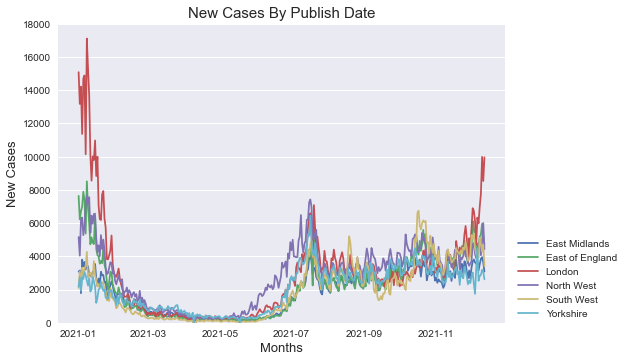

In [19]:
plotDates = df.loc[:, 'date'].values

filterEOE = df['areaName']=='East of England'
filterEM = df['areaName']=='East Midlands'
filterNW = df['areaName']=='North West'
filterL = df['areaName']=='London'
filterSW = df['areaName']=='South West'
filterYH = df['areaName']=='Yorkshire and The Humber'

EM = df[filterEM]['newCasesByPublishDate']
dateEM = df[filterEM]['date']
plotEM = EM.values
plotDateEM = dateEM.values

EOE = df[filterEOE]['newCasesByPublishDate']
dateEOE = df[filterEOE]['date']
plotEOE = EOE.values
plotDateEOE = dateEOE.values

L = df[filterL]['newCasesByPublishDate']
dateL = df[filterL]['date']
plotL = L.values
plotDateL = dateL.values

NW = df[filterNW]['newCasesByPublishDate']
dateNW = df[filterNW]['date']
plotNW = NW.values
plotDateNW = dateNW.values


SW = df[filterSW]['newCasesByPublishDate']
dateSW = df[filterSW]['date']
plotSW = SW.values
plotDateSW = dateSW.values

YH = df[filterYH]['newCasesByPublishDate']
dateYH= df[filterYH]['date']
plotYH = YH.values
plotDateYH = dateYH.values

plt.style.use('seaborn')

plt.plot(plotDateEM, plotEM, label= "East Midlands")
plt.plot(plotDateEOE, plotEOE, label= "East of England")
plt.plot(plotDateL, plotL, label= "London")
plt.plot(plotDateNW, plotNW, label='North West')
plt.plot(plotDateSW, plotSW, label='South West')
plt.plot(plotDateYH, plotYH, label='Yorkshire')


plt.ylim(bottom=0, top=18000)
plt.xlabel('Months', fontsize=13)
plt.ylabel('New Cases', fontsize=13)
plt.title('New Cases By Publish Date', fontsize=15)
plt.grid(axis='x')
plt.legend(loc=(1.02,0))

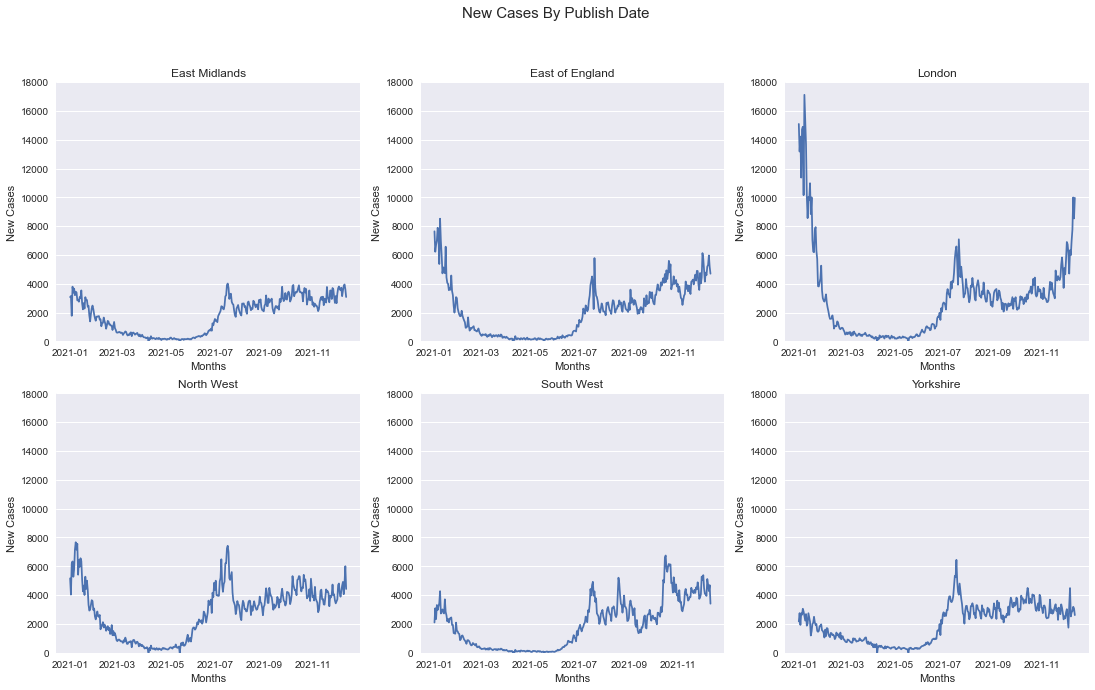

In [20]:
plt.style.use('seaborn')


fig, axs = plt.subplots(2, 3)
fig.suptitle('New Cases By Publish Date', fontsize=15)

axs[0,0].plot(plotDateEM, plotEM, label= "East Midlands")
axs[0,0].set_title("East Midlands")
axs[0,0].set_ylim(bottom=0, top=18000)
axs[0,0].set_xlabel('Months')
axs[0,0].set_ylabel('New Cases')
axs[0,0].grid(axis='x')

axs[0,1].plot(plotDateEOE, plotEOE, label= "East of England")
axs[0,1].set_title("East of England")
axs[0,1].set_ylim(bottom=0, top=18000)
axs[0,1].set_xlabel('Months')
axs[0,1].set_ylabel('New Cases')
axs[0,1].grid(axis='x')

axs[0,2].plot(plotDateL, plotL, label= "London")
axs[0,2].set_title("London")
axs[0,2].set_ylim(bottom=0, top=18000)
axs[0,2].set_xlabel('Months')
axs[0,2].set_ylabel('New Cases')
axs[0,2].grid(axis='x')

axs[1,0].plot(plotDateNW, plotNW, label='North West')
axs[1,0].set_title("North West")
axs[1,0].set_ylim(bottom=0, top=18000)
axs[1,0].set_xlabel('Months')
axs[1,0].set_ylabel('New Cases')
axs[1,0].grid(axis='x')

axs[1,1].plot(plotDateSW, plotSW, label='South West')
axs[1,1].set_title("South West")
axs[1,1].set_ylim(bottom=0, top=18000)
axs[1,1].set_xlabel('Months')
axs[1,1].set_ylabel('New Cases')
axs[1,1].grid(axis='x')

axs[1,2].plot(plotDateYH, plotYH, label='Yorkshire')
axs[1,2].set_title("Yorkshire")
axs[1,2].set_ylim(bottom=0, top=18000)
axs[1,2].set_xlabel('Months')
axs[1,2].set_ylabel('New Cases')
axs[1,2].grid(axis='x')



fig.set_size_inches(18.5, 10.5)

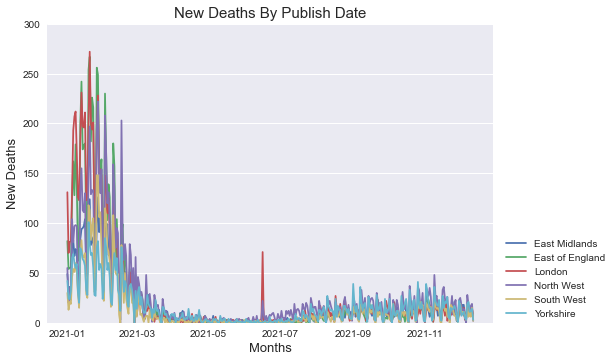

In [21]:
plotDates = df.loc[:, 'date'].values

filterEOE = df['areaName']=='East of England'
filterEM = df['areaName']=='East Midlands'
filterNW = df['areaName']=='North West'
filterL = df['areaName']=='London'
filterSW = df['areaName']=='South West'
filterYH = df['areaName']=='Yorkshire and The Humber'

EM = df[filterEM]['newDeaths28DaysByPublishDate']
dateEM = df[filterEM]['date']
plotEM = EM.values
plotDateEM = dateEM.values

EOE = df[filterEOE]['newDeaths28DaysByPublishDate']
dateEOE = df[filterEOE]['date']
plotEOE = EOE.values
plotDateEOE = dateEOE.values

L = df[filterL]['newDeaths28DaysByPublishDate']
dateL = df[filterL]['date']
plotL = L.values
plotDateL = dateL.values

NW = df[filterNW]['newDeaths28DaysByPublishDate']
dateNW = df[filterNW]['date']
plotNW = NW.values
plotDateNW = dateNW.values


SW = df[filterSW]['newDeaths28DaysByPublishDate']
dateSW = df[filterSW]['date']
plotSW = SW.values
plotDateSW = dateSW.values

YH = df[filterYH]['newDeaths28DaysByPublishDate']
dateYH= df[filterYH]['date']
plotYH = YH.values
plotDateYH = dateYH.values

plt.style.use('seaborn')

plt.plot(plotDateEM, plotEM, label= "East Midlands")
plt.plot(plotDateEOE, plotEOE, label= "East of England")
plt.plot(plotDateL, plotL, label= "London")
plt.plot(plotDateNW, plotNW, label='North West')
plt.plot(plotDateSW, plotSW, label='South West')
plt.plot(plotDateYH, plotYH, label='Yorkshire')


plt.ylim(bottom=0, top=300)
plt.xlabel('Months', fontsize=13)
plt.ylabel('New Deaths', fontsize=13)
plt.title('New Deaths By Publish Date', fontsize=15)
plt.grid(axis='x')
plt.legend(loc=(1.02,0))

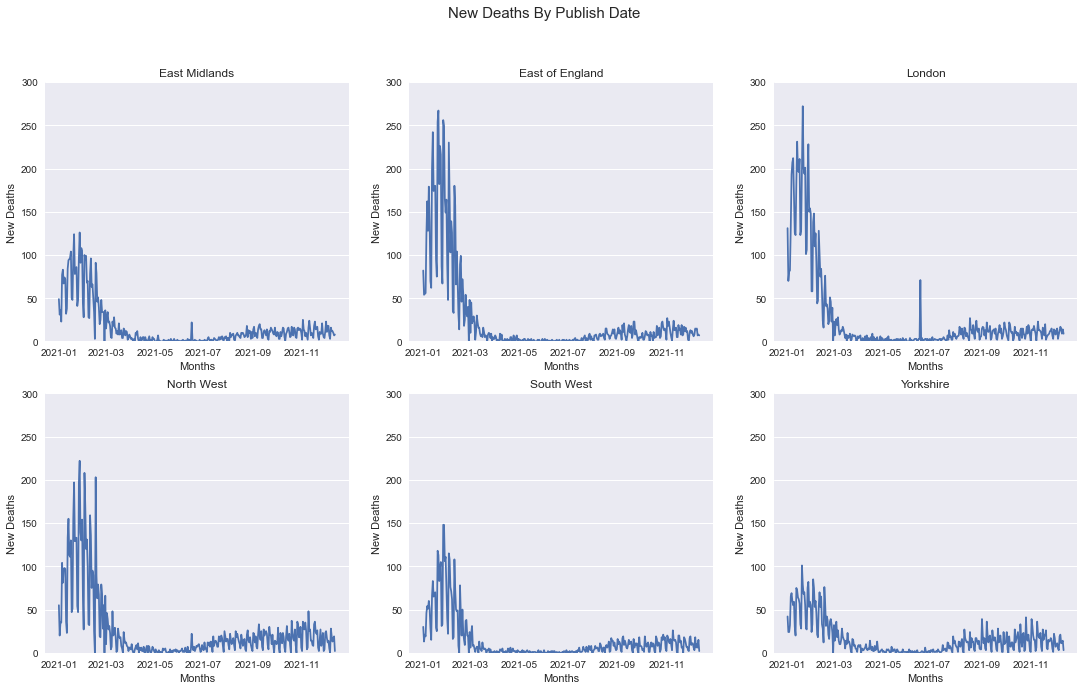

In [22]:
plt.style.use('seaborn')


fig, axs = plt.subplots(2, 3)
fig.suptitle('New Deaths By Publish Date', fontsize=15)

axs[0,0].plot(plotDateEM, plotEM, label= "East Midlands")
axs[0,0].set_title("East Midlands")
axs[0,0].set_ylim(bottom=0, top=300)
axs[0,0].set_xlabel('Months')
axs[0,0].set_ylabel('New Deaths')
axs[0,0].grid(axis='x')

axs[0,1].plot(plotDateEOE, plotEOE, label= "East of England")
axs[0,1].set_title("East of England")
axs[0,1].set_ylim(bottom=0, top=300)
axs[0,1].set_xlabel('Months')
axs[0,1].set_ylabel('New Deaths')
axs[0,1].grid(axis='x')

axs[0,2].plot(plotDateL, plotL, label= "London")
axs[0,2].set_title("London")
axs[0,2].set_ylim(bottom=0, top=300)
axs[0,2].set_xlabel('Months')
axs[0,2].set_ylabel('New Deaths')
axs[0,2].grid(axis='x')

axs[1,0].plot(plotDateNW, plotNW, label='North West')
axs[1,0].set_title("North West")
axs[1,0].set_ylim(bottom=0, top=300)
axs[1,0].set_xlabel('Months')
axs[1,0].set_ylabel('New Deaths')
axs[1,0].grid(axis='x')

axs[1,1].plot(plotDateSW, plotSW, label='South West')
axs[1,1].set_title("South West")
axs[1,1].set_ylim(bottom=0, top=300)
axs[1,1].set_xlabel('Months')
axs[1,1].set_ylabel('New Deaths')
axs[1,1].grid(axis='x')

axs[1,2].plot(plotDateYH, plotYH, label='Yorkshire')
axs[1,2].set_title("Yorkshire")
axs[1,2].set_ylim(bottom=0, top=300)
axs[1,2].set_xlabel('Months')
axs[1,2].set_ylabel('New Deaths')
axs[1,2].grid(axis='x')



fig.set_size_inches(18.5, 10.5)

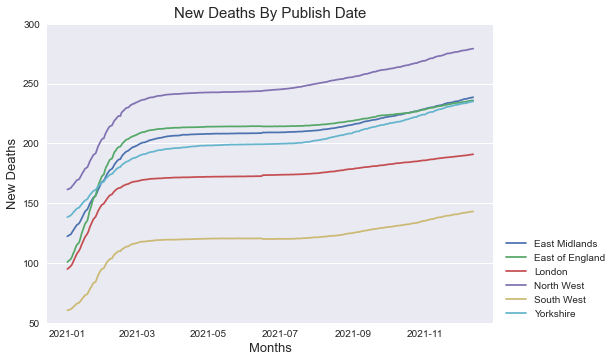

In [23]:
plotDates = df.loc[:, 'date'].values

filterEOE = df['areaName']=='East of England'
filterEM = df['areaName']=='East Midlands'
filterNW = df['areaName']=='North West'
filterL = df['areaName']=='London'
filterSW = df['areaName']=='South West'
filterYH = df['areaName']=='Yorkshire and The Humber'

EM = df[filterEM]['cumDeaths28DaysByPublishDateRate']
dateEM = df[filterEM]['date']
plotEM = EM.values
plotDateEM = dateEM.values

EOE = df[filterEOE]['cumDeaths28DaysByPublishDateRate']
dateEOE = df[filterEOE]['date']
plotEOE = EOE.values
plotDateEOE = dateEOE.values

L = df[filterL]['cumDeaths28DaysByPublishDateRate']
dateL = df[filterL]['date']
plotL = L.values
plotDateL = dateL.values

NW = df[filterNW]['cumDeaths28DaysByPublishDateRate']
dateNW = df[filterNW]['date']
plotNW = NW.values
plotDateNW = dateNW.values


SW = df[filterSW]['cumDeaths28DaysByPublishDateRate']
dateSW = df[filterSW]['date']
plotSW = SW.values
plotDateSW = dateSW.values

YH = df[filterYH]['cumDeaths28DaysByPublishDateRate']
dateYH= df[filterYH]['date']
plotYH = YH.values
plotDateYH = dateYH.values

plt.style.use('seaborn')

plt.plot(plotDateEM, plotEM, label= "East Midlands")
plt.plot(plotDateEOE, plotEOE, label= "East of England")
plt.plot(plotDateL, plotL, label= "London")
plt.plot(plotDateNW, plotNW, label='North West')
plt.plot(plotDateSW, plotSW, label='South West')
plt.plot(plotDateYH, plotYH, label='Yorkshire')


plt.ylim(bottom=50, top=300)
plt.xlabel('Months', fontsize=13)
plt.ylabel('New Deaths', fontsize=13)
plt.title('New Deaths By Publish Date', fontsize=15)
plt.grid(axis='x')
plt.legend(loc=(1.02,0))

In [24]:
# Cumulative data as stated by record

dateFilter = df['date']=='2021-12-12'
cumData = df[dateFilter][['date', 'areaName', 'cumCasesByPublishDate']]
cumData.sort_values(by=['areaName'])

,date,areaName,cumCasesByPublishDate
1383,2021-12-12,East Midlands,813192.0
1037,2021-12-12,East of England,942726.0
691,2021-12-12,London,1381289.0
2075,2021-12-12,North West,1360063.0
345,2021-12-12,South West,797168.0
1729,2021-12-12,Yorkshire and The Humber,954088.0


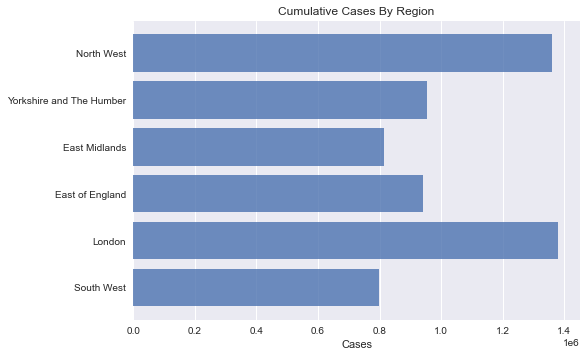

In [25]:
# create plot
objects = cumData['areaName'].values
y_pos = np.arange(len(objects))
performance = cumData['cumCasesByPublishDate'].values


plt.barh(y_pos, performance, align='center', alpha=0.8)
plt.yticks(y_pos, objects)
plt.xlabel('Cases')
plt.title('Cumulative Cases By Region')
plt.grid(axis='y')
plt.show()




In [26]:
# Cumulative data as stated by record

dateFilter = df['date']=='2021-12-12'
cumDeathData = df[dateFilter][['date', 'areaName', 'cumDeaths28DaysByPublishDate']]
cumDeathData.sort_values(by=['areaName'])

,date,areaName,cumDeaths28DaysByPublishDate
1383,2021-12-12,East Midlands,11607
1037,2021-12-12,East of England,14795
691,2021-12-12,London,17183
2075,2021-12-12,North West,20571
345,2021-12-12,South West,8100
1729,2021-12-12,Yorkshire and The Humber,12990


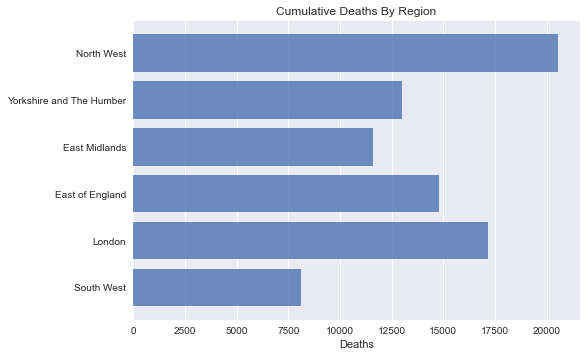

In [27]:
# create plot
objects = cumDeathData['areaName'].values
y_pos = np.arange(len(objects))
performance = cumDeathData['cumDeaths28DaysByPublishDate'].values


plt.barh(y_pos, performance, align='center', alpha=0.8)
plt.yticks(y_pos, objects)
plt.xlabel('Deaths')
plt.title('Cumulative Deaths By Region')
plt.grid(axis='y')
plt.show()



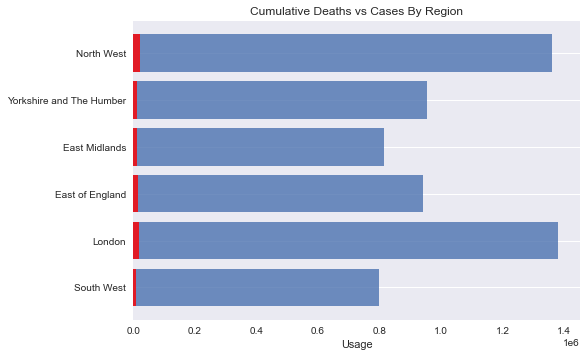

In [28]:
# data set
dateFilter = df['date']=='2021-12-12'
cumDeathData = df[dateFilter][['date', 'areaName', 'cumDeaths28DaysByPublishDate']]
cumData = df[dateFilter][['date', 'areaName', 'cumCasesByPublishDate']]

x = cumDeathData['areaName'].values
y1 = cumDeathData['cumDeaths28DaysByPublishDate'].values
y2 = cumData['cumCasesByPublishDate'].values

# plot stacked bar chart 
 
plt.barh(x, y2, alpha=0.8 )
plt.barh(x, y1, color='r', alpha=0.8)

plt.xlabel('Usage')
plt.title('Cumulative Deaths vs Cases By Region')
plt.grid(axis='x')


# Prediction Model

- Finally, construct a model that can make some predictions or forecast trends.

## Cross industry standard process for data minig (CRIPS-DM)

- Business Understanding
- Data Understanding
    - Numerical
        - Ratio - Numbers
    - Nominal
        - Date - Ordinal
        - Catagorical - Area
- Data Preperation
    - Choosing 2021
    - Fixing Mismatched cumVals
    - Solving Nan Values
    - Removing unncecesary col
    - Convert catagorical data into nums
    - Split Data
        - Train - to train data - builds the model
        - Test - to test data - meassures success
        
- Modeling
- Evaluation
- Deployment

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

finename = 'data.xlsx'
df = pd.read_excel(filename)



# Evaluation

- Critically evaluate your results 
- and compare your findings to other similar studies.